# Immunotherapy for wart treatment

The following is the development of a predictive analysis regarding the success or failure of an immunotherapy product for treatment of warts, based on a dataset available within the University of California, Irvine, Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset<sup>1</sup>. In the original research report , the accuracy of their predictive model was 83.33% (compared with predictive accuracy of 80.7% for modeling of cryotherapy success)<sup>2</sup>. In a separate study of efficacy, 76.7% of patients were cured of warts with the immunotherapy treatment, compared with 56.7% who were treated with cryotherapy<sup>3</sup>.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVC
from xgboost import (XGBClassifier, plot_importance, DMatrix)
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

## Exploratory data analysis

In [2]:
imm_df = pd.read_excel('./Immunotherapy.xlsx', header=0, index_col=None)
imm_df.columns = ['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area', 'induration_diameter', 'Result_of_Treatment']
imm_df.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


In [3]:
imm_df.head(60)

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
5,1,15,5.00,3,3,84,7,1
6,1,35,9.75,2,2,8,6,1
7,2,28,7.50,4,1,9,2,1
8,2,19,6.00,2,1,225,8,1
9,2,32,12.00,6,3,35,5,0


In [4]:
imm_df.tail(30)

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
60,2,47,3.75,14,2,67,50,1
61,2,19,2.25,8,2,42,70,1
62,2,33,8.00,5,1,63,25,1
63,2,15,4.00,12,1,72,30,1
64,1,17,8.50,2,1,44,8,1
65,1,29,5.00,12,3,75,7,1
66,1,27,11.75,8,1,208,6,0
67,2,51,6.00,6,1,80,2,1
68,1,35,6.75,4,3,41,8,1
69,2,47,10.75,8,1,57,5,0


In [5]:
imm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
sex                    90 non-null int64
age                    90 non-null int64
Time                   90 non-null float64
Number_of_Warts        90 non-null int64
Type                   90 non-null int64
Area                   90 non-null int64
induration_diameter    90 non-null int64
Result_of_Treatment    90 non-null int64
dtypes: float64(1), int64(7)
memory usage: 5.7 KB


There are no missing values in this data set.

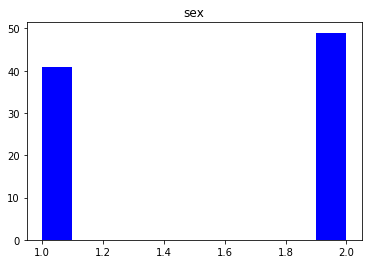

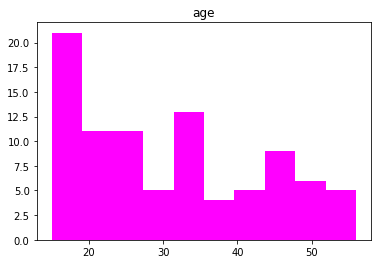

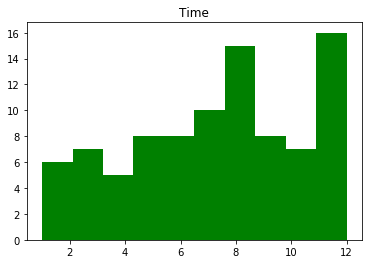

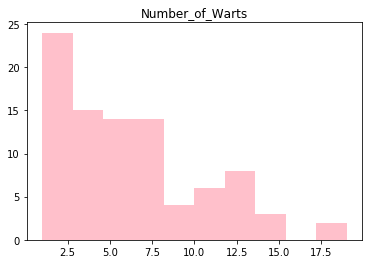

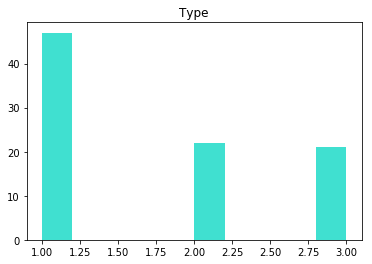

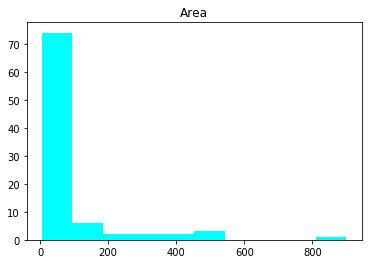

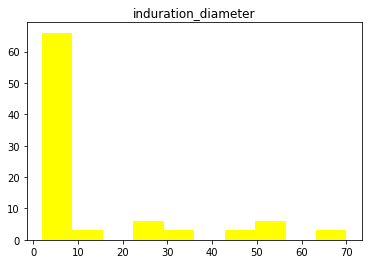

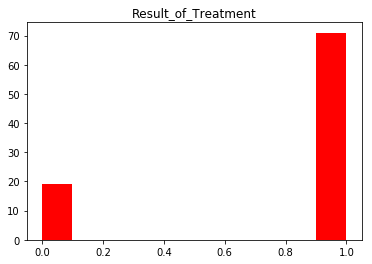

In [6]:
plt.hist(imm_df.sex, color='blue')
plt.title('sex')
plt.show()

plt.hist(imm_df.age, color='magenta')
plt.title('age')
plt.show()

plt.hist(imm_df.Time, color='green')
plt.title('Time')
plt.show()

plt.hist(imm_df.Number_of_Warts, color='pink')
plt.title('Number_of_Warts')
plt.show()

plt.hist(imm_df.Type, color='turquoise')
plt.title('Type')
plt.show()

plt.hist(imm_df.Area, color='aqua')
plt.title('Area')
plt.show()

plt.hist(imm_df.induration_diameter, color='yellow')
plt.title('induration_diameter')
plt.show()

plt.hist(imm_df.Result_of_Treatment, color='red')
plt.title('Result_of_Treatment')
plt.show()

The data set reflects the apparently high level of efficacy of the immunotherapy treatment by showing an unequal target class with, here, over 70 patients showing success and about 20 showing treatment failure. Most variables show fairly unsurprising histograms, though none look normally distributed. The data set represents a small number of people, however, so a larger population may appear more normally distributed for age, for instance. Variables such as area, induration diameter, and number of warts are more heavily weighted toward low values, which is sensible if considering that many patients may be expected to seek treatment upon initial presentation of a wart (though this itself is a hypothesis). 


Heatmap of correlations between variables


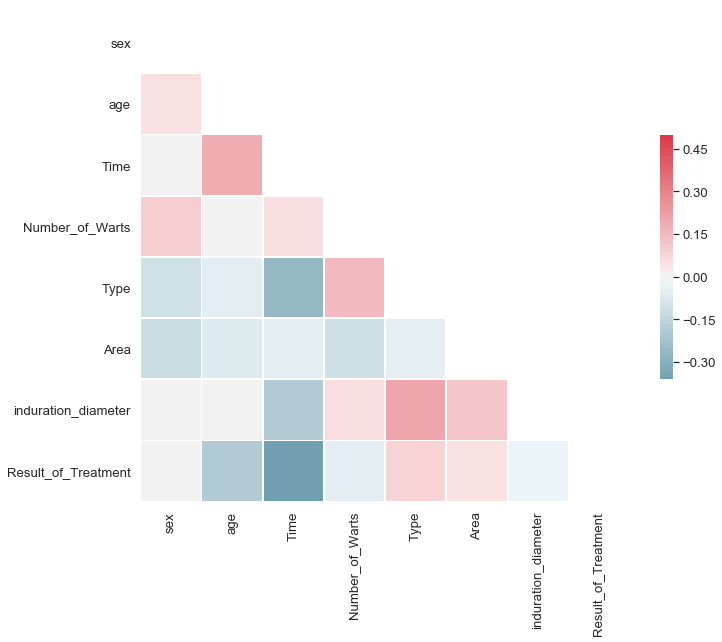

In [7]:
sns.set(style="white", font_scale=1.20)
corr = imm_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print('\033[1m' + "\nHeatmap of correlations between variables")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [8]:
def pearson_general(colA, colB, alpha=0.001):
    A = imm_df[colA].astype(float)
    B = imm_df[colB].astype(float) 
    
    r, p = pearsonr(B,A)
    if p<alpha:
        result="\033[1m {} with {}:".format(colA,colB)
    else:
        result="\033[0m {} with {}:".format(colA,colB)
    print(result, f"Pearson r = {round(r,3)}, p = {round(p,5)}")

print('\033[4m\033[1m\nPearson correlation coefficients (r) and p-values (p) for relationships between continuous variables:\n\033[0m')
cols = ['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area', 'induration_diameter', 'Result_of_Treatment']
for e,f in itertools.combinations(cols,2):
    pearson_general(e,f)


Pearson correlation coefficients (r) and p-values (p) for relationships between continuous variables:

 sex with age: Pearson r = 0.044, p = 0.68268
 sex with Time: Pearson r = -0.015, p = 0.8897
 sex with Number_of_Warts: Pearson r = 0.101, p = 0.34457
 sex with Type: Pearson r = -0.105, p = 0.32641
 sex with Area: Pearson r = -0.116, p = 0.27766
 sex with induration_diameter: Pearson r = 0.015, p = 0.88691
 sex with Result_of_Treatment: Pearson r = 0.019, p = 0.86017
 age with Time: Pearson r = 0.189, p = 0.07444
 age with Number_of_Warts: Pearson r = 0.0, p = 0.99931
 age with Type: Pearson r = -0.057, p = 0.59597
 age with Area: Pearson r = -0.064, p = 0.54689
 age with induration_diameter: Pearson r = -0.007, p = 0.94776
 age with Result_of_Treatment: Pearson r = -0.188, p = 0.07549
 Time with Number_of_Warts: Pearson r = 0.051, p = 0.63443
 Time with Type: Pearson r = -0.263, p = 0.01231
 Time with Area: Pearson r = -0.047, p = 0.6583
 Time with induration_diameter: Pearson r = 

Both the heatmap and the Pearson's R correlation coefficients suggest there are not strong associations between any variables, including most variables with the target class (Result_of_Treatment). This is conducive to machine learning analysis since this suggests variables are relatively independent of each other. Time on treatment (number of months) does show a highly statistically significant correlation with the target class, and time on treatment also shows a statistically significant correlation with type of wart (common, plantar, or both).

## Machine learning for predictive analysis

In [9]:
#inherently multilabel target analyses, no binary unless I did OneHotEncoder
X = imm_df.drop('Result_of_Treatment', axis = 1)
y = imm_df.Result_of_Treatment

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=29)

In [10]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf.fit(X_train, y_train)
print('Basic Random Forest accuracy on training data:',round(rf.score(X_train, y_train),3))
print('Basic Random Forest accuracy on test data:',round(rf.score(X_test, y_test),3))

rf_pred = rf.predict(X_test)
print(classification_report(y_test,rf_pred))
param_grid = {'n_estimators' : [1,3,9,18,36,96,200,600], 'max_depth': [1,3,9], 'min_samples_leaf': [1,3,10]}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_params_)
print(CV_rf.best_score_)
print(CV_rf.best_estimator_)

Basic Random Forest accuracy on training data: 1.0
Basic Random Forest accuracy on test data: 0.87
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.86      1.00      0.92        18

   micro avg       0.87      0.87      0.87        23
   macro avg       0.93      0.70      0.75        23
weighted avg       0.89      0.87      0.85        23

{'max_depth': 9, 'min_samples_leaf': 3, 'n_estimators': 9}
0.9104477611940298
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=9, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
#using parameters found by Grid Search plus feature selection by square root
#rfcc_tuned = RandomForestClassifier(CV_rfcc.best_estimator_)
rf_tuned = CV_rf.best_estimator_
rf_tuned.fit(X_train, y_train)
y_true, y_predict = y_test, rf_tuned.predict(X_test)
print('Tuned random forest accuracy on training data:',round(rf_tuned.score(X_train, y_train),3))
print('Tuned random forest accuracy on test data:',round(rf_tuned.score(X_test, y_test),3))
print('\nClassification report:\n',classification_report(y_true,y_predict))
print('Confusion matrix:\n',confusion_matrix(y_true,y_predict))

Tuned random forest accuracy on training data: 0.91
Tuned random forest accuracy on test data: 0.913

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.90      1.00      0.95        18

   micro avg       0.91      0.91      0.91        23
   macro avg       0.95      0.80      0.85        23
weighted avg       0.92      0.91      0.90        23

Confusion matrix:
 [[ 3  2]
 [ 0 18]]


ROC score for tuned Random Forest model: 0.6944


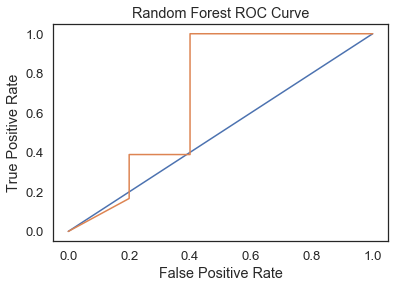

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = rf_tuned.predict_proba(X_test)[:,1]
print('ROC score for tuned Random Forest model:', round(roc_auc_score(y_test, y_pred_prob),4))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='Random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [13]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight #(class_weight, y, indices=None)[source]

print(y[14])
print(y[4])
cw = compute_class_weight('balanced',[0,1],y)
sw = compute_sample_weight('balanced', y, indices=None)
print(sw[14])
print(sw[4])

1
1
0.6338028169014085
0.6338028169014085


In [14]:
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from matplotlib import cm


X1_train, X1_test, y1_train, y1_test, sw_train, sw_test = \
    train_test_split(X, y, sw, random_state=100, stratify=y)

AU-ROC score for uncalibrated Random Forest model: 0.8278
AU-ROC score for isotonically calibrated Random Forest model: 0.7722
AU-ROC score for sigmoid calibrated Random Forest model: 0.9333

Brier scores: (the smaller the better)
No calibration: 0.270
With isotonic calibration: 0.192
With sigmoid calibration: 0.247


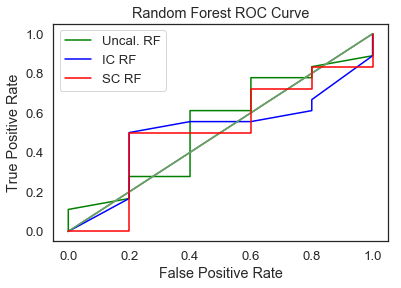

In [15]:
# RF with no calibration
rfn = RandomForestClassifier(n_estimators=300, class_weight='balanced')
rfn.fit(X1_train, y1_train)  
prob_pos_rf1 = rfn.predict_proba(X1_test)[:, 1]
print('AU-ROC score for uncalibrated Random Forest model:', round(roc_auc_score(y1_test, prob_pos_rf1),4))

# RF with isotonic calibration
rf_isotonic = CalibratedClassifierCV(rfn, cv=2, method='isotonic')
rf_isotonic.fit(X1_train, y1_train, sw_train)
prob_pos_isotonicrf = rf_isotonic.predict_proba(X1_test)[:, 1]
print('AU-ROC score for isotonically calibrated Random Forest model:', round(roc_auc_score(y1_test, prob_pos_isotonicrf),4))

# RF with sigmoid calibration
rf_sigmoid = CalibratedClassifierCV(rfn, cv=2, method='sigmoid')
rf_sigmoid.fit(X1_train, y1_train, sw_train)
prob_pos_sigmoidrf = rf_sigmoid.predict_proba(X1_test)[:, 1]
print('AU-ROC score for sigmoid calibrated Random Forest model:', round(roc_auc_score(y1_test, prob_pos_sigmoidrf),4))

print("\nBrier scores: (the smaller the better)")

rf_score = brier_score_loss(y1_test, prob_pos_rf1, sw_test)
print("No calibration: %1.3f" % rf_score)

rf_isotonic_score = brier_score_loss(y1_test, prob_pos_isotonicrf, sw_test)
print("With isotonic calibration: %1.3f" % rf_isotonic_score)

rf_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoidrf, sw_test)
print("With sigmoid calibration: %1.3f" % rf_sigmoid_score)


fpr1, tpr1, thresholds1 = roc_curve(y_test, prob_pos_rf1)
plt.plot([0,1],[0,1])
plt.plot(fpr1,tpr1, label='Uncal. RF', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr2, tpr2, thresholds2 = roc_curve(y_test, prob_pos_isotonicrf)
plt.plot([0,1],[0,1])
plt.plot(fpr2,tpr2, label='IC RF', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr3, tpr3, thresholds3 = roc_curve(y_test, prob_pos_sigmoidrf)
plt.plot([0,1],[0,1])
plt.plot(fpr3,tpr3, label='SC RF', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')

plt.legend()
plt.show()



AU-ROC score for uncalibrated Random Forest model: 0.8278
AU-ROC score for isotonically calibrated Random Forest model: 0.7111
AU-ROC score for sigmoid calibrated Random Forest model: 0.9333

Brier scores: (the smaller the better)
No calibration: 0.270
With isotonic calibration: 0.231
With sigmoid calibration: 0.247


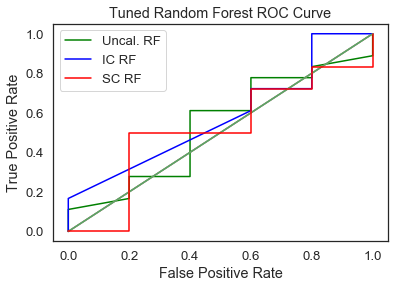

In [35]:
# RF with no calibration
rftn = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=9, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


            
rftn.fit(X1_train, y1_train)  
prob_pos_rft1 = rfn.predict_proba(X1_test)[:, 1]
print('AU-ROC score for uncalibrated Random Forest model:', round(roc_auc_score(y1_test, prob_pos_rft1),4))

# RF with isotonic calibration
rft_isotonic = CalibratedClassifierCV(rftn, cv=2, method='isotonic')
rft_isotonic.fit(X1_train, y1_train, sw_train)
prob_pos_isotonicrft = rft_isotonic.predict_proba(X1_test)[:, 1]
print('AU-ROC score for isotonically calibrated Random Forest model:', round(roc_auc_score(y1_test, prob_pos_isotonicrft),4))

# RF with sigmoid calibration
rft_sigmoid = CalibratedClassifierCV(rftn, cv=2, method='sigmoid')
rft_sigmoid.fit(X1_train, y1_train, sw_train)
prob_pos_sigmoidrft = rf_sigmoid.predict_proba(X1_test)[:, 1]
print('AU-ROC score for sigmoid calibrated Random Forest model:', round(roc_auc_score(y1_test, prob_pos_sigmoidrft),4))

print("\nBrier scores: (the smaller the better)")

rft_score = brier_score_loss(y1_test, prob_pos_rft1, sw_test)
print("No calibration: %1.3f" % rft_score)

rft_isotonic_score = brier_score_loss(y1_test, prob_pos_isotonicrft, sw_test)
print("With isotonic calibration: %1.3f" % rft_isotonic_score)

rft_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoidrft, sw_test)
print("With sigmoid calibration: %1.3f" % rft_sigmoid_score)


fpr1, tpr1, thresholds1 = roc_curve(y_test, prob_pos_rft1)
plt.plot([0,1],[0,1])
plt.plot(fpr1,tpr1, label='Uncal. RF', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr2, tpr2, thresholds2 = roc_curve(y_test, prob_pos_isotonicrft)
plt.plot([0,1],[0,1])
plt.plot(fpr2,tpr2, label='IC RF', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr3, tpr3, thresholds3 = roc_curve(y_test, prob_pos_sigmoidrft)
plt.plot([0,1],[0,1])
plt.plot(fpr3,tpr3, label='SC RF', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Random Forest ROC Curve')

plt.legend()
plt.show()

With random forest classification, the tuned model produced an accuracy of 91% for training data and 91.3% for test data, with an AUC-ROC of 61.4%. With the imbalanced target class present in this data set, probability of result can diverge from default parameters, so isotonic and sigmoid calibrations were tested next. With sigmoid calibration, the AUC-ROC for a random forest model was 93.3% (regardless of whether tuned parameters were used). The random forest model with these adjustments has performed fairly well, but a few other classification models will be checked to determine if a better model is likely.

In [17]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
print('Accuracy on training data:',round(lr.score(X_train, y_train),3))
print('Accuracy on test data:',round(lr.score(X_test, y_test),3))

lr_pred = lr.predict(X_test)
print(classification_report(y_test,lr_pred))

Accuracy on training data: 0.672
Accuracy on test data: 0.783
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.88      0.83      0.86        18

   micro avg       0.78      0.78      0.78        23
   macro avg       0.69      0.72      0.70        23
weighted avg       0.80      0.78      0.79        23



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

AU-ROC score for uncalibrated Log Reg model: 0.7111
AU-ROC score for isotonically calibrated Log Reg model: 0.5833
AU-ROC score for sigmoid calibrated Log Reg model: 0.1889

Brier scores: (the smaller the better)
No calibration: 0.216
With isotonic calibration: 0.229
With sigmoid calibration: 0.212


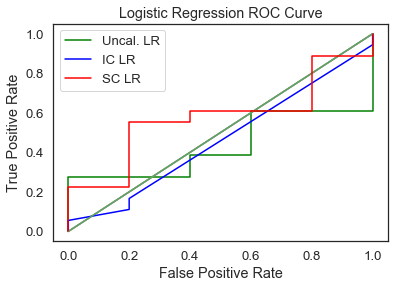

In [18]:
# LR with no calibration
logrn = LogisticRegression(class_weight='balanced')
logrn.fit(X1_train, y1_train)  
prob_pos_logrn1 = logrn.predict_proba(X1_test)[:, 1]
print('AU-ROC score for uncalibrated Log Reg model:', round(roc_auc_score(y1_test, prob_pos_logrn1),4))

# LR with isotonic calibration
logr_isotonic = CalibratedClassifierCV(logrn, cv=2, method='isotonic')
logr_isotonic.fit(X1_train, y1_train, sw_train)
prob_pos_isotoniclogr = logr_isotonic.predict_proba(X1_test)[:, 1]
print('AU-ROC score for isotonically calibrated Log Reg model:', round(roc_auc_score(y1_test, prob_pos_isotoniclogr),4))

# LR with sigmoid calibration
logr_sigmoid = CalibratedClassifierCV(logrn, cv=2, method='sigmoid')
logr_sigmoid.fit(X1_train, y1_train, sw_train)
prob_pos_sigmoidlogr = logr_sigmoid.predict_proba(X1_test)[:, 1]
print('AU-ROC score for sigmoid calibrated Log Reg model:', round(roc_auc_score(y1_test, prob_pos_sigmoidlogr),4))

print("\nBrier scores: (the smaller the better)")

logrn_score = brier_score_loss(y1_test, prob_pos_logrn1, sw_test)
print("No calibration: %1.3f" % logrn_score)

logr_isotonic_score = brier_score_loss(y1_test, prob_pos_isotoniclogr, sw_test)
print("With isotonic calibration: %1.3f" % logr_isotonic_score)

logr_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoidlogr, sw_test)
print("With sigmoid calibration: %1.3f" % logr_sigmoid_score)


fpr1, tpr1, thresholds1 = roc_curve(y_test, prob_pos_logrn1)
plt.plot([0,1],[0,1])
plt.plot(fpr1,tpr1, label='Uncal. LR', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr2, tpr2, thresholds2 = roc_curve(y_test, prob_pos_isotoniclogr)
plt.plot([0,1],[0,1])
plt.plot(fpr2,tpr2, label='IC LR', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr3, tpr3, thresholds3 = roc_curve(y_test, prob_pos_sigmoidlogr)
plt.plot([0,1],[0,1])
plt.plot(fpr3,tpr3, label='SC LR', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.legend()
plt.show()



In [19]:
#extra = ExtraTreesClassifier(n_estimators=250, random_state=0)
extra = ExtraTreesClassifier(n_estimators=100, class_weight='balanced')
extra.fit(X_train, y_train)
print('Accuracy on training data:',round(extra.score(X_train, y_train),3))
print('Accuracy on test data:',round(extra.score(X_test, y_test),3))

extra_pred = extra.predict(X_test)
print(classification_report(y_test,extra_pred))

Accuracy on training data: 1.0
Accuracy on test data: 0.783
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.78      1.00      0.88        18

   micro avg       0.78      0.78      0.78        23
   macro avg       0.39      0.50      0.44        23
weighted avg       0.61      0.78      0.69        23



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AU-ROC score for uncalibrated Extra Trees model: 0.7278
AU-ROC score for isotonically calibrated Extra Trees model: 0.8556
AU-ROC score for sigmoid calibrated Extra Trees model: 0.9

Brier scores: (the smaller the better)
No calibration: 0.260
With isotonic calibration: 0.168
With sigmoid calibration: 0.293


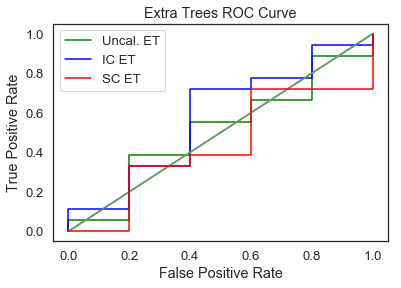

In [20]:
# ET with no calibration
etn = ExtraTreesClassifier(n_estimators=300, class_weight='balanced')
etn.fit(X1_train, y1_train)  
prob_pos_et1 = etn.predict_proba(X1_test)[:, 1]
print('AU-ROC score for uncalibrated Extra Trees model:', round(roc_auc_score(y1_test, prob_pos_et1),4))

# ET with isotonic calibration
et_isotonic = CalibratedClassifierCV(etn, cv=2, method='isotonic')
et_isotonic.fit(X1_train, y1_train, sw_train)
prob_pos_isotonicet = et_isotonic.predict_proba(X1_test)[:, 1]
print('AU-ROC score for isotonically calibrated Extra Trees model:', round(roc_auc_score(y1_test, prob_pos_isotonicet),4))

# ET with sigmoid calibration
et_sigmoid = CalibratedClassifierCV(etn, cv=2, method='sigmoid')
et_sigmoid.fit(X1_train, y1_train, sw_train)
prob_pos_sigmoidet = et_sigmoid.predict_proba(X1_test)[:, 1]
print('AU-ROC score for sigmoid calibrated Extra Trees model:', round(roc_auc_score(y1_test, prob_pos_sigmoidet),4))

print("\nBrier scores: (the smaller the better)")

et_score = brier_score_loss(y1_test, prob_pos_et1, sw_test)
print("No calibration: %1.3f" % et_score)

et_isotonic_score = brier_score_loss(y1_test, prob_pos_isotonicet, sw_test)
print("With isotonic calibration: %1.3f" % et_isotonic_score)

et_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoidet, sw_test)
print("With sigmoid calibration: %1.3f" % et_sigmoid_score)



fpr1, tpr1, thresholds1 = roc_curve(y_test, prob_pos_et1)
plt.plot([0,1],[0,1])
plt.plot(fpr1,tpr1, label='Uncal. ET', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr2, tpr2, thresholds2 = roc_curve(y_test, prob_pos_isotonicet)
plt.plot([0,1],[0,1])
plt.plot(fpr2,tpr2, label='IC ET', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr3, tpr3, thresholds3 = roc_curve(y_test, prob_pos_sigmoidet)
plt.plot([0,1],[0,1])
plt.plot(fpr3,tpr3, label='SC ET', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extra Trees ROC Curve')

plt.legend()
plt.show()



Accuracy on training data: 0.97
Accuracy on test data: 0.739


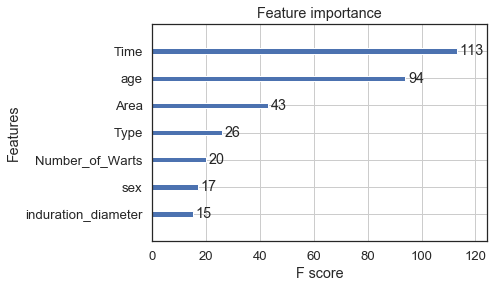

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.80      0.89      0.84        18

   micro avg       0.74      0.74      0.74        23
   macro avg       0.57      0.54      0.55        23
weighted avg       0.70      0.74      0.71        23



In [21]:
xgb = XGBClassifier(class_weight='balanced')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
predictions1 = [round(value) for value in y_pred]
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Accuracy on training data:',round(xgb.score(X_train, y_train),3))
print('Accuracy on test data:',round(xgb.score(X_test, y_test),3))

plot_importance(xgb)
plt.show()
print(classification_report(y_test,predictions1))

AU-ROC score for uncalibrated XGBoost model: 0.6222
AU-ROC score for isotonically calibrated XGBoost model: 0.6333
AU-ROC score for sigmoid calibrated XGBoost model: 0.6556

Brier scores: (the smaller the better)
No calibration: 0.349
With isotonic calibration: 0.250
With sigmoid calibration: 0.255


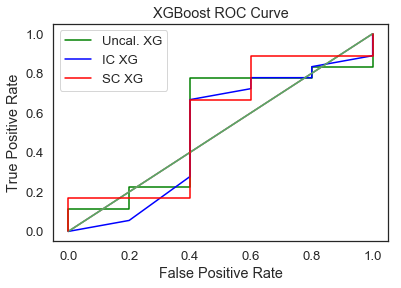

In [22]:
# XG with no calibration
#xgn = XGBClassifier(max_depth=20)
xgn = XGBClassifier() #performing better without parameters added, unlike above...or maybe just isotonic is.
xgn.fit(X1_train, y1_train)  
prob_pos_xg1 = xgn.predict_proba(X1_test)[:, 1]
print('AU-ROC score for uncalibrated XGBoost model:', round(roc_auc_score(y1_test, prob_pos_xg1),4))

# XG with isotonic calibration
xg_isotonic = CalibratedClassifierCV(xgn, cv=2, method='isotonic')
xg_isotonic.fit(X1_train, y1_train, sw_train)
prob_pos_isotonicxg = xg_isotonic.predict_proba(X1_test)[:, 1]
print('AU-ROC score for isotonically calibrated XGBoost model:', round(roc_auc_score(y1_test, prob_pos_isotonicxg),4))

# XG with sigmoid calibration
xg_sigmoid = CalibratedClassifierCV(xgn, cv=2, method='sigmoid')
xg_sigmoid.fit(X1_train, y1_train, sw_train)
prob_pos_sigmoidxg = xg_sigmoid.predict_proba(X1_test)[:, 1]
print('AU-ROC score for sigmoid calibrated XGBoost model:', round(roc_auc_score(y1_test, prob_pos_sigmoidxg),4))

print("\nBrier scores: (the smaller the better)")

xg_score = brier_score_loss(y1_test, prob_pos_xg1, sw_test)
print("No calibration: %1.3f" % xg_score)

xg_isotonic_score = brier_score_loss(y1_test, prob_pos_isotonicxg, sw_test)
print("With isotonic calibration: %1.3f" % xg_isotonic_score)

xg_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoidxg, sw_test)
print("With sigmoid calibration: %1.3f" % xg_sigmoid_score)


fpr1, tpr1, thresholds1 = roc_curve(y_test, prob_pos_xg1)
plt.plot([0,1],[0,1])
plt.plot(fpr1,tpr1, label='Uncal. XG', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr2, tpr2, thresholds2 = roc_curve(y_test, prob_pos_isotonicxg)
plt.plot([0,1],[0,1])
plt.plot(fpr2,tpr2, label='IC XG', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr3, tpr3, thresholds3 = roc_curve(y_test, prob_pos_sigmoidxg)
plt.plot([0,1],[0,1])
plt.plot(fpr3,tpr3, label='SC XG', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')

plt.legend()
plt.show()



### A look at how predictive accuracy can improve with model and calibration

In [23]:
xg_pred = xgb.predict(X_test)
print(list(zip(y_test,xg_pred)))
print(confusion_matrix(y_test, xg_pred))

[(0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1)]
[[ 1  4]
 [ 2 16]]


In [24]:
xgsig_pred = xg_sigmoid.predict(X_test)
print(list(zip(y_test,xgsig_pred)))
print(confusion_matrix(y_test, xgsig_pred))

[(0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0)]
[[ 4  1]
 [ 2 16]]


In [25]:
rfsig_pred = rf_sigmoid.predict(X_test)
print(list(zip(y_test,rfsig_pred)))
print(confusion_matrix(y_test, rfsig_pred))

[(0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1)]
[[ 4  1]
 [ 1 17]]


The random forest model with sigmoid calibration provided the best model among these presented. Beyond accuracy or AUC values, however, model interpretability is important for end-users trying to determine the value and individual signals that can be extracted from the analysis. The XGBoost feature importance figure above suggests that time on treatment and, secondarily, age are important features predicting success or failure of treatment. XGBoost did not perform as well as the random forest model did, though. Next will be an approach using the SHAP python package<sup>4</sup> to view both global and local feature importances and how the model features influence individual predictions.

### Interpretability with the sigmoid-calibrated random forest model 

In [26]:
import shap
shap.initjs() 

explainer = shap.KernelExplainer(rf_sigmoid.predict_proba, X_train)
shap_values = explainer.shap_values(X_test, nsamples=100)

shap.force_plot(explainer.expected_value[0], shap_values[1][0,:], X_test.iloc[0,:], link="logit")

100%|██████████| 23/23 [00:07<00:00,  2.85it/s]


In [27]:
shap.force_plot(explainer.expected_value[0], shap_values[1], X_test)

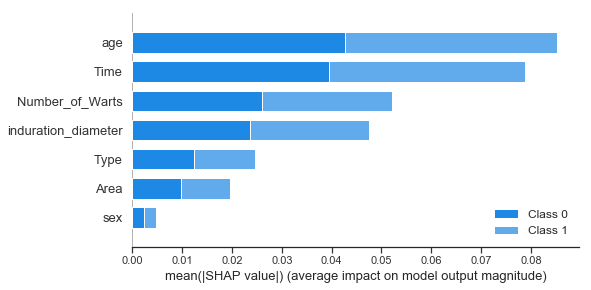

In [28]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

According to SHAP analysis of the sigmoid-calibrated random forest model, age of the patient was the most influential factor determining success or failure of treatment, followed by time and then features specific to the presentation of wart pathology, and, lastly, sex. The input for SHAP analyses of individuals can be adjusted to reveal how each patient's feature values impacted the prediction for his/her treatment success.

Machine learning produced a good predictive model for treatment success here, but sometimes deep learning using a neural network can provide even better classification results, so that will be examined quickly next.

## Neural network

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [30]:
# results are similar whether spreading output into 2 categories or leaving as-is
model = Sequential()
model.add(Dense(50, input_dim=7, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))

In [31]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
early_stopping = EarlyStopping(patience=3)
# Fit the model
#model.fit(X, y, epochs=20, batch_size=10)
model.fit(X_train, y_train, epochs=20, validation_split=0.3, callbacks = [early_stopping])

Train on 46 samples, validate on 21 samples
Epoch 1/20
46/46 [==============================] - 2s 38ms/step - loss: 3.4657 - acc: 0.7826 - val_loss: 3.0366 - val_acc: 0.8095
Epoch 2/20
46/46 [==============================] - 0s 542us/step - loss: 3.4657 - acc: 0.7826 - val_loss: 3.0366 - val_acc: 0.8095
Epoch 3/20
46/46 [==============================] - 0s 594us/step - loss: 3.4657 - acc: 0.7826 - val_loss: 3.0366 - val_acc: 0.8095
Epoch 4/20
46/46 [==============================] - 0s 600us/step - loss: 3.4657 - acc: 0.7826 - val_loss: 3.0366 - val_acc: 0.8095


In [33]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

67/67 [==============================] - 0s 149us/step

acc: 79.10%


In [34]:
scores1 = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores1[1]*100))

23/23 [==============================] - 0s 206us/step

acc: 78.26%


The neural network here showed results similar to many of the standard machine learning models here, so the sigmoid-calibrated random forest model remains the best model among those attempted here. 

## Conclusion

For assessing a prediction of success or failure for use of an immunotherapy-based wart treatment, a sigmoid-calibrated random forest model gave the best AUC-ROC result (93.3%). SHAP-based model interpretability provided clues that patient age and time on treatment were indicators of success. Time on treatment is understandable given that a longer time on treatment may be indicative that the treatment is not working. Age may relate to other immune-related factors that go beyond the scope of this analysis. This model can be used to develop a prediction of an individual patient's success or failure on this treatment and also reveal the factors influencing this prediction.

## References

<sup>1</sup>Khozeimeh F, Layegh P, Alizadehsani R, Roshanzamir M. Immunotherapy Dataset Data Set. https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset. Dua D, Karra Taniskidou E. UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 2017.

<sup>2</sup>Khozeimeh F, Alizadehsani R, Roshanzamir M, Khosravi A, Layegh P, Nahavandi S. An expert system for selecting wart treatment method. *Comput Biol Med.* 2017;81:167-175.

<sup>3</sup>Khozeimeh F, Jabbari Azad F, Mahboubi Oskouei Y, et al. Intralesional immunotherapy compared to cryotherapy in the treatment of warts. *Int J Dermatol.* 2017;56:474-478.

<sup>4</sup>Lundberg S. Shap. https://github.com/slundberg/shap. 2018.